# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Dan Chiriac 437593
    
    2. Manas Mehrotra 429400
    
    3. Touyen Nguyenová 413004

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [37]:
#your imports (only use libraries provided in the environment)
!pip install pydotplus networkx umap-learn==0.5.3 seaborn p_decision_tree

import warnings

import pydotplus
import networkx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from p_decision_tree.DecisionTree import DecisionTree

from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

sns.set(rc={'figure.figsize':(30, 25)})
warnings.filterwarnings('ignore')
%matplotlib inline

airbnb_original_path = "./data/AirBnB_original.csv"
airbnb_cleaned_path = "./data/AirBnB_cleaned.csv"
airbnb_utilization_path = "./data/AirBnB_utilization.csv"

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set (18 points)

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes. **(0.5 point)**

In [3]:
df_original = pd.read_csv(airbnb_original_path)
df_original.head()

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1


### Basic Cleaning (4 points)

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove? **(0.5 points)**

In [4]:
print(f"Removed rows: {df_original[df_original.isna().any(axis=1)].shape[0]}")

Removed rows: 1477


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed? **(0.5 point)**

In [5]:
print(f"Removed duplicates: {sum(df_original['id'].duplicated())}")

Removed duplicates: 400


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation. **(1 point)**

In [6]:
df_clean = pd.read_csv(airbnb_cleaned_path)
percetile = df_clean['price'].describe().loc[['mean','25%','75%','std']]
percetile

mean    625.463680
25%     340.000000
75%     913.000000
std     331.236241
Name: price, dtype: float64

You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset. **(2 points)**

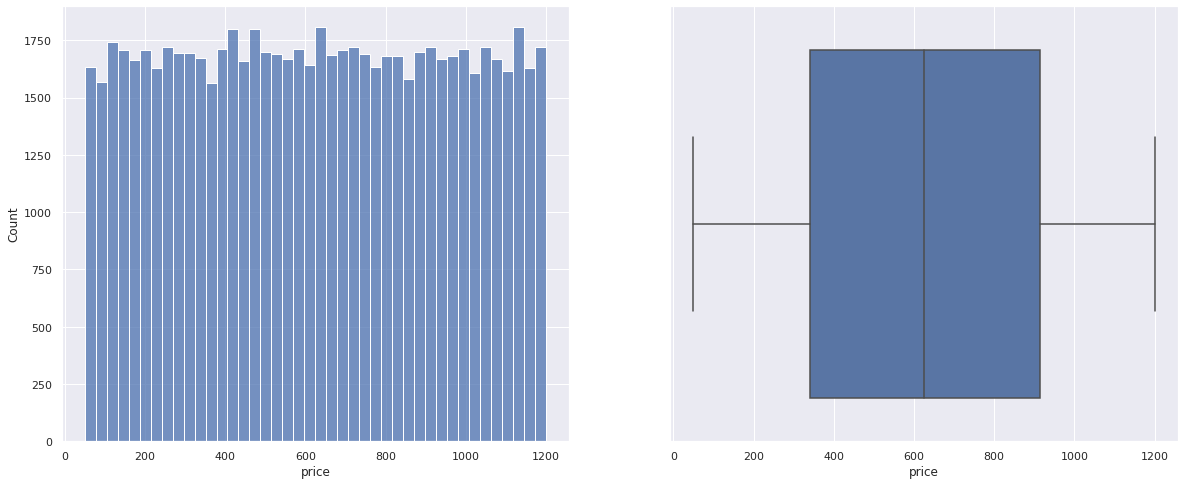

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(data=df_clean, x='price', ax=ax1)
sns.boxplot(data=df_clean, x='price', ax=ax2)
plt.show()

### Exploring Price Relationships (3 points)

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment


In [8]:
df_clean.nunique()

id                                70842
host id                           70841
neighborhood group                    5
neighborhood                        222
lat                               20020
long                              16404
country                               1
country code                          1
instant bookable                      1
cancellation policy                   3
room type                             4
construction year                    20
price                              1151
service fee                         231
minimum nights                        7
number of reviews                   468
review rate number                    5
calculated host listings count       78
number rooms                          4
dtype: int64

In [9]:
df_clean['country'].unique()
df_clean['country code'].unique()
loc_table = pd.pivot_table(df_clean, values='price', index=['neighborhood group', 'neighborhood']) # 222
loc_table.shape[0] == df_clean['neighborhood'].unique().shape[0]


True

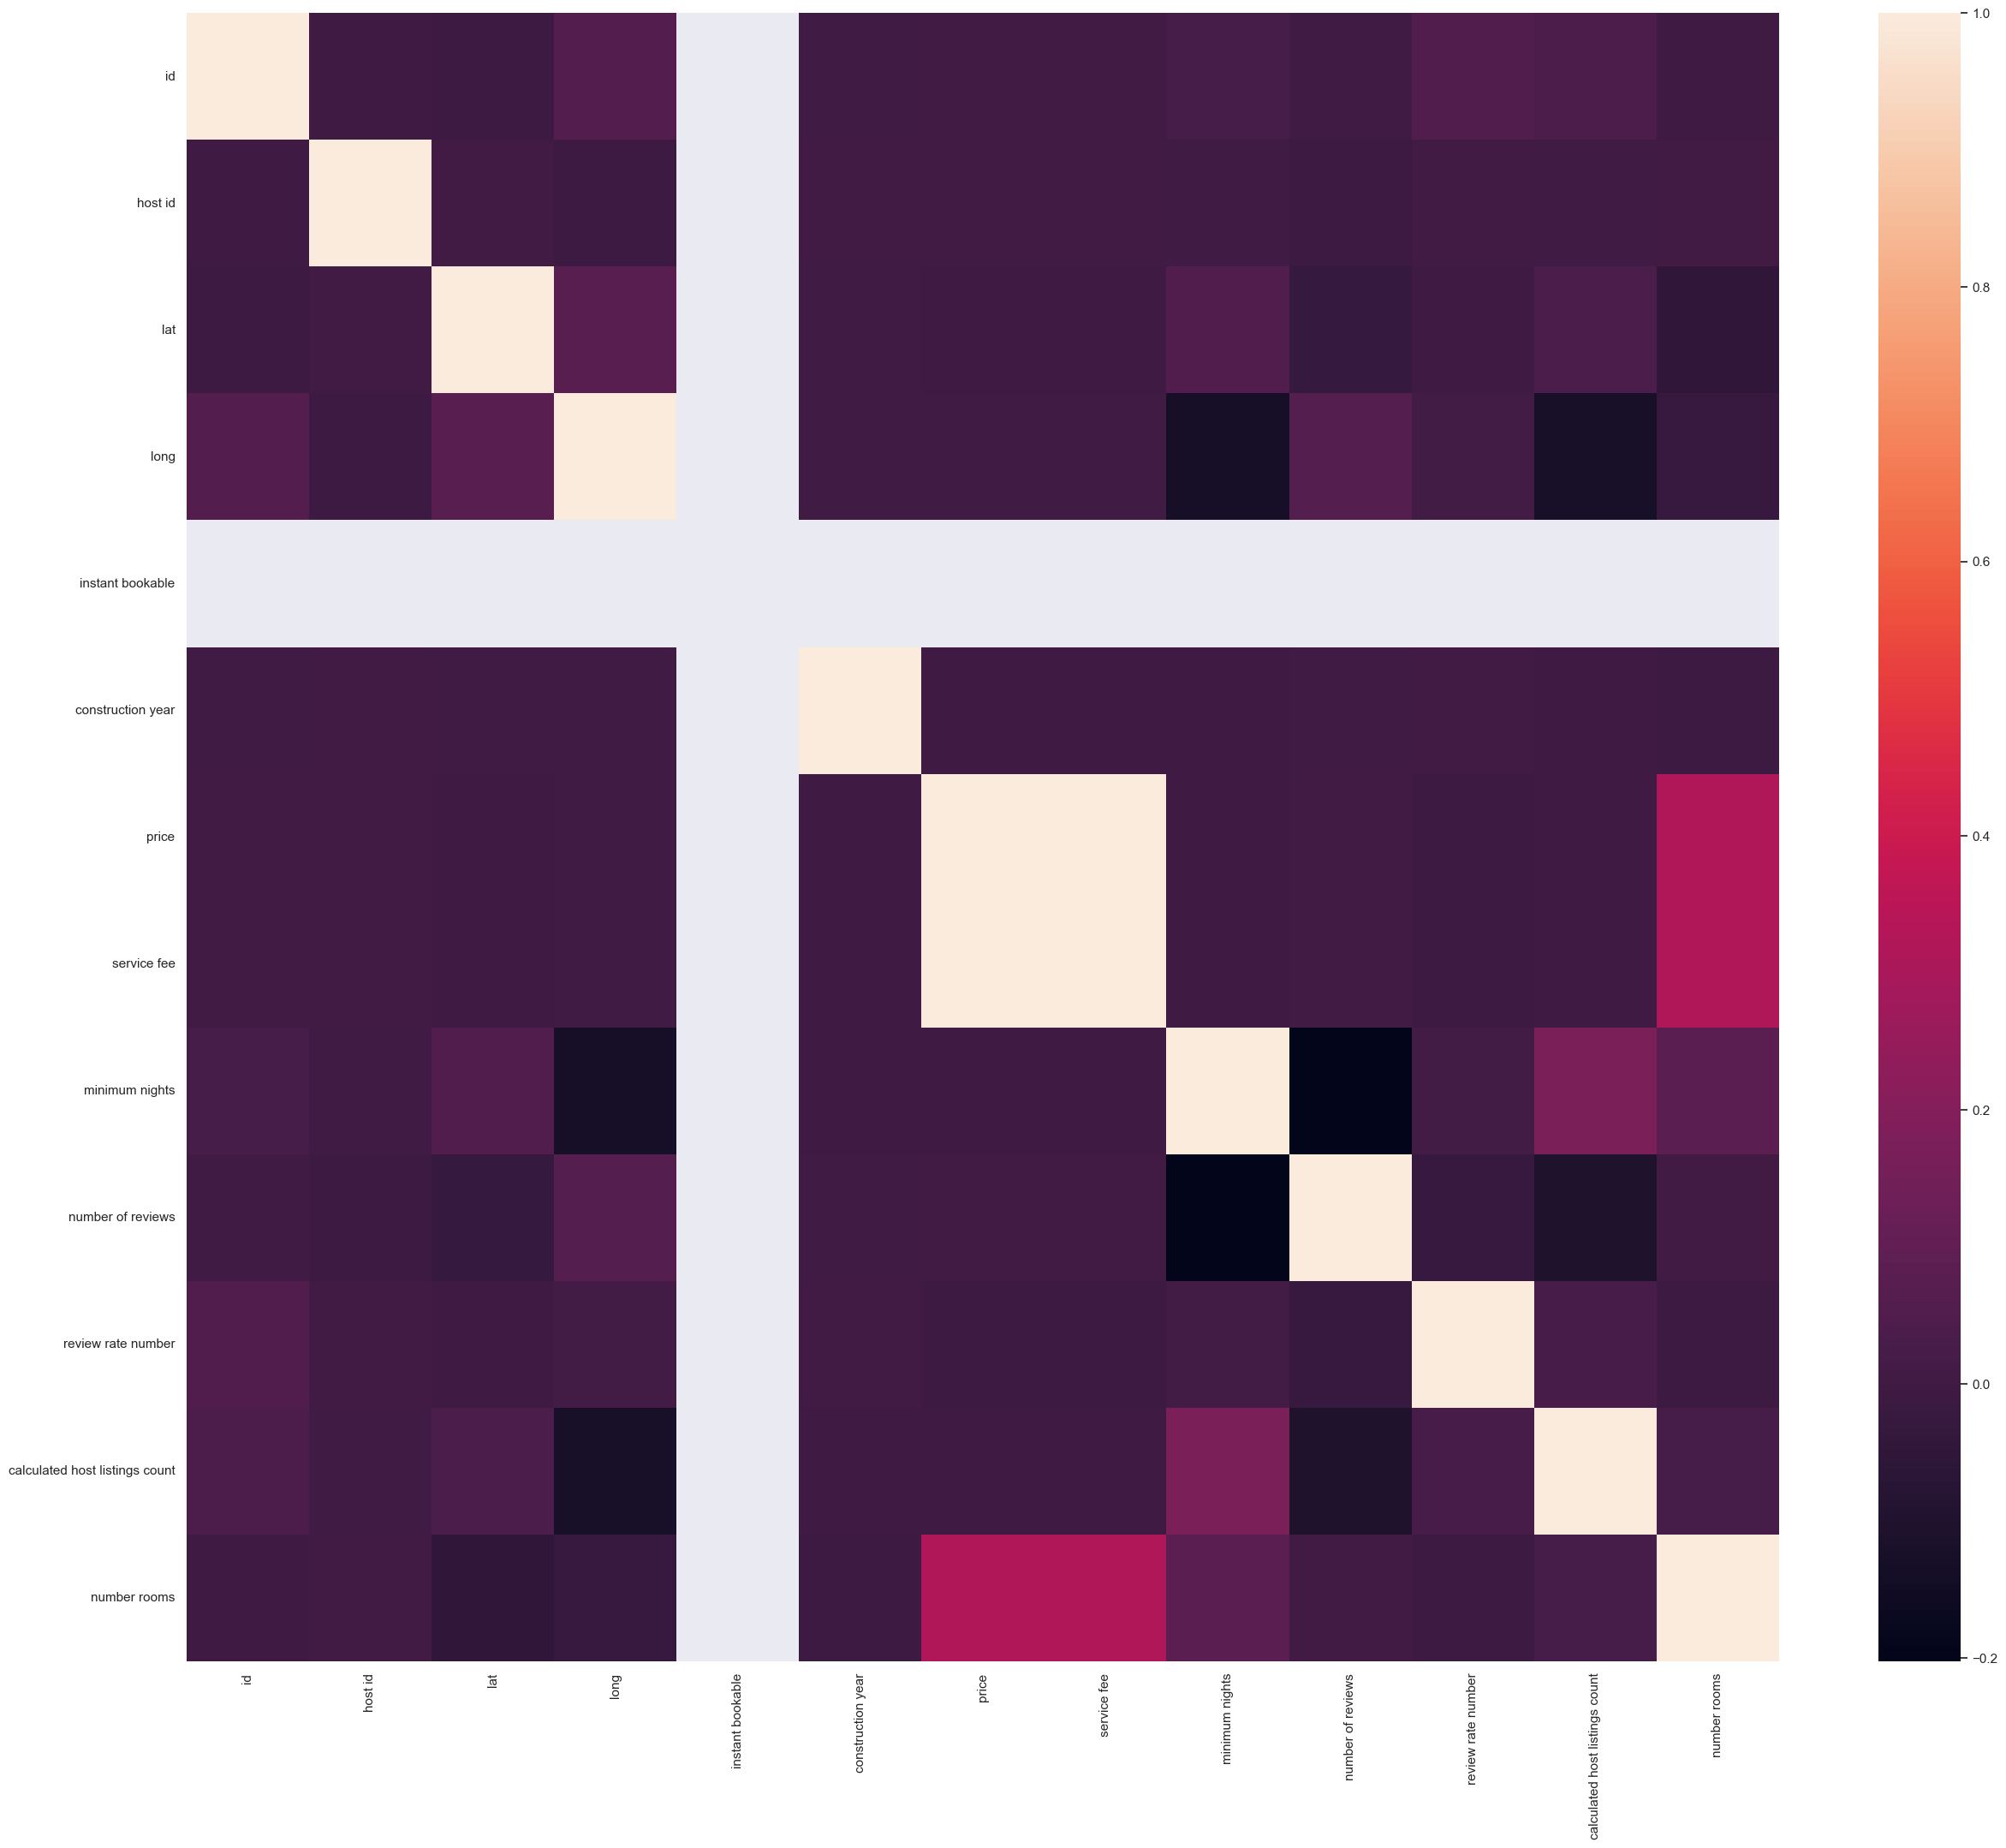

In [11]:
sns.heatmap(df_clean.corr());

_Answer:_ 

- <s>id</s>: Insignificant
- <s>host id</s>: Insignificant
- <b>neighborhood group</b>: Location influences price, but this feature could be determined with the one below - for neighborhood groups, neighborhoods are unique.
- <b>neighborhood</b>: Location influences price - argumentation above supported by ```loc_table.shape[0] == clean_df['neighborhood'].unique().shape[0]```
- <s>lat</s>: Location influences price values that we don't really need because of it over specification. It is enough to know the region of airbnb rents, than concrete location.
- <s>long</s>: Same argumentation as above.
- <s>country</s>: ```clean_df['country'].unique()``` - All of the apartments are located in the US, thus obsolete.
- <s>country code</s>: ```clean_df['country code'].unique()``` - All of the apartments are located in the US, thus obsolete.
- <s>instant bookable</s>: Regardless of practical value ```clean_df['instant bookable'].unique()```  shows that there is only one unique value.
- <b>cancellation policy</b>: Flexibility is practical for guests, but impractical for hosts -> influences price.
- <b>room type</b>: Depending what type of appartment we have, it can influence the price.
- <b>construction year</b>: This values can show us if price can variate from when the building was built. 
- <b>price</b>: This will be our target feature.
- <b>service fee</b>: It can be usefull to compare fees with different number of prices or to see if the fee is bigger if the house is older, or if neighborhood groups has different service fees.
- <b>minimum nights</b>: To understand what is the threshold for the poeple to rent an appartment.
- <s>number of reviews</s>: Because the idea is to give in rent the appartment, it is not necessary to know the review of other rented appartments.
- <b>review rate number</b>: Because it shows the information about the rentat appartment, the comment above is relevant here as well.
- <s>calculated host listings count</s>: This column is not so usefull, because it shows the information of the specific host, regarding his appartment, not ours.
- <b>number rooms</b>: The price can variate depending from the number of rooms. So if the house have multiple rooms, the price can be higher than appartments with one or two rooms.

### Univariate Analysis (4.5 points)

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision? **(1 point)**

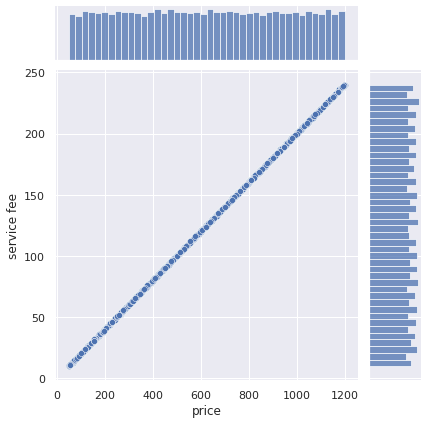

In [10]:
sns.jointplot(data=df_clean, x='price', y='service fee')

_Answer:_ The bigger the price, the bigger the fee.




Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation. **(1 point)**

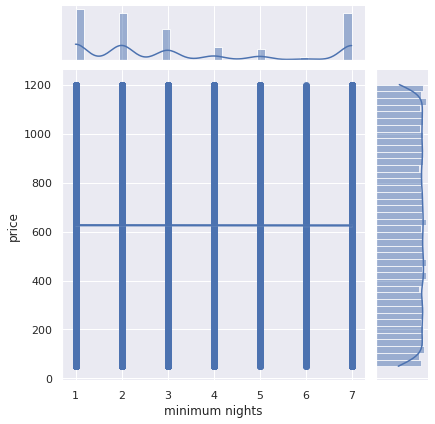

In [11]:
sns.jointplot(data=df_clean, x='minimum nights', y='price', kind="reg")

_Answer:_ From the plot we can see that people are renting the appartment or for a really short, or for a really long amount of time. 



To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price? **(2.5 point)**

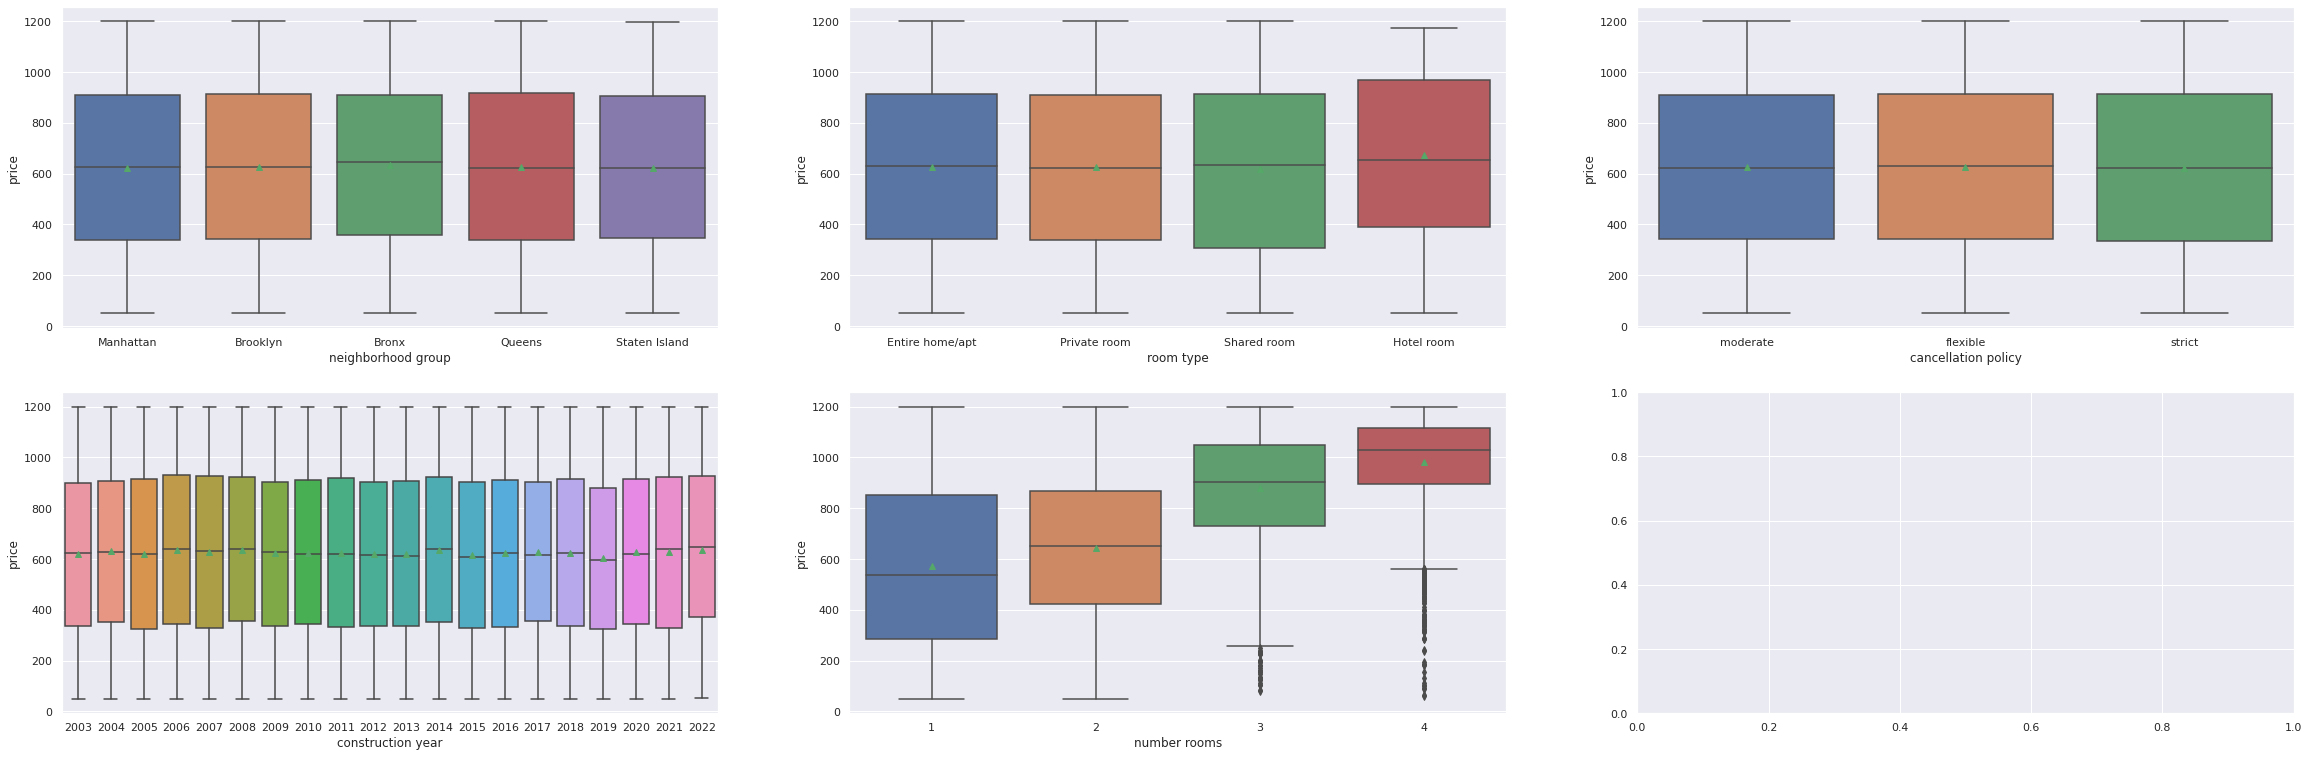

In [12]:
# Your answer goes here
fig, axes = plt.subplots(2, 3, figsize=(40,13))
sns.boxplot(x="neighborhood group",
            y="price",
            data=df_clean,
            showmeans=True,ax=axes[0, 0])
sns.boxplot(x="room type",
            y="price",
            data=df_clean,
            showmeans=True,ax=axes[0, 1])
sns.boxplot(x="cancellation policy",
            y="price",
            data=df_clean,
            showmeans=True,ax=axes[0, 2])
sns.boxplot(x="construction year",
            y="price",
            data=df_clean,
            showmeans=True,ax=axes[1, 0])
sns.boxplot(x="number rooms",
            y="price",
            data=df_clean,
            showmeans=True,ax=axes[1, 1])
plt.show()


_Answer:_ From the plot we can see that the only feature that influences the price most is the number of rooms. It is really hard to find an appartment in a big city, especially in NY, so people most of the time don't really care about the neighborhood or when it was built, because of a high demand and a limited supply. Most of people are seeking for a 1 or 2 rooms appartment more, because it's cheaper to maintain. 




### Multivariate Analysis (5 points)

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision. 

#### Multivariate Analysis for Neighborhood Group 

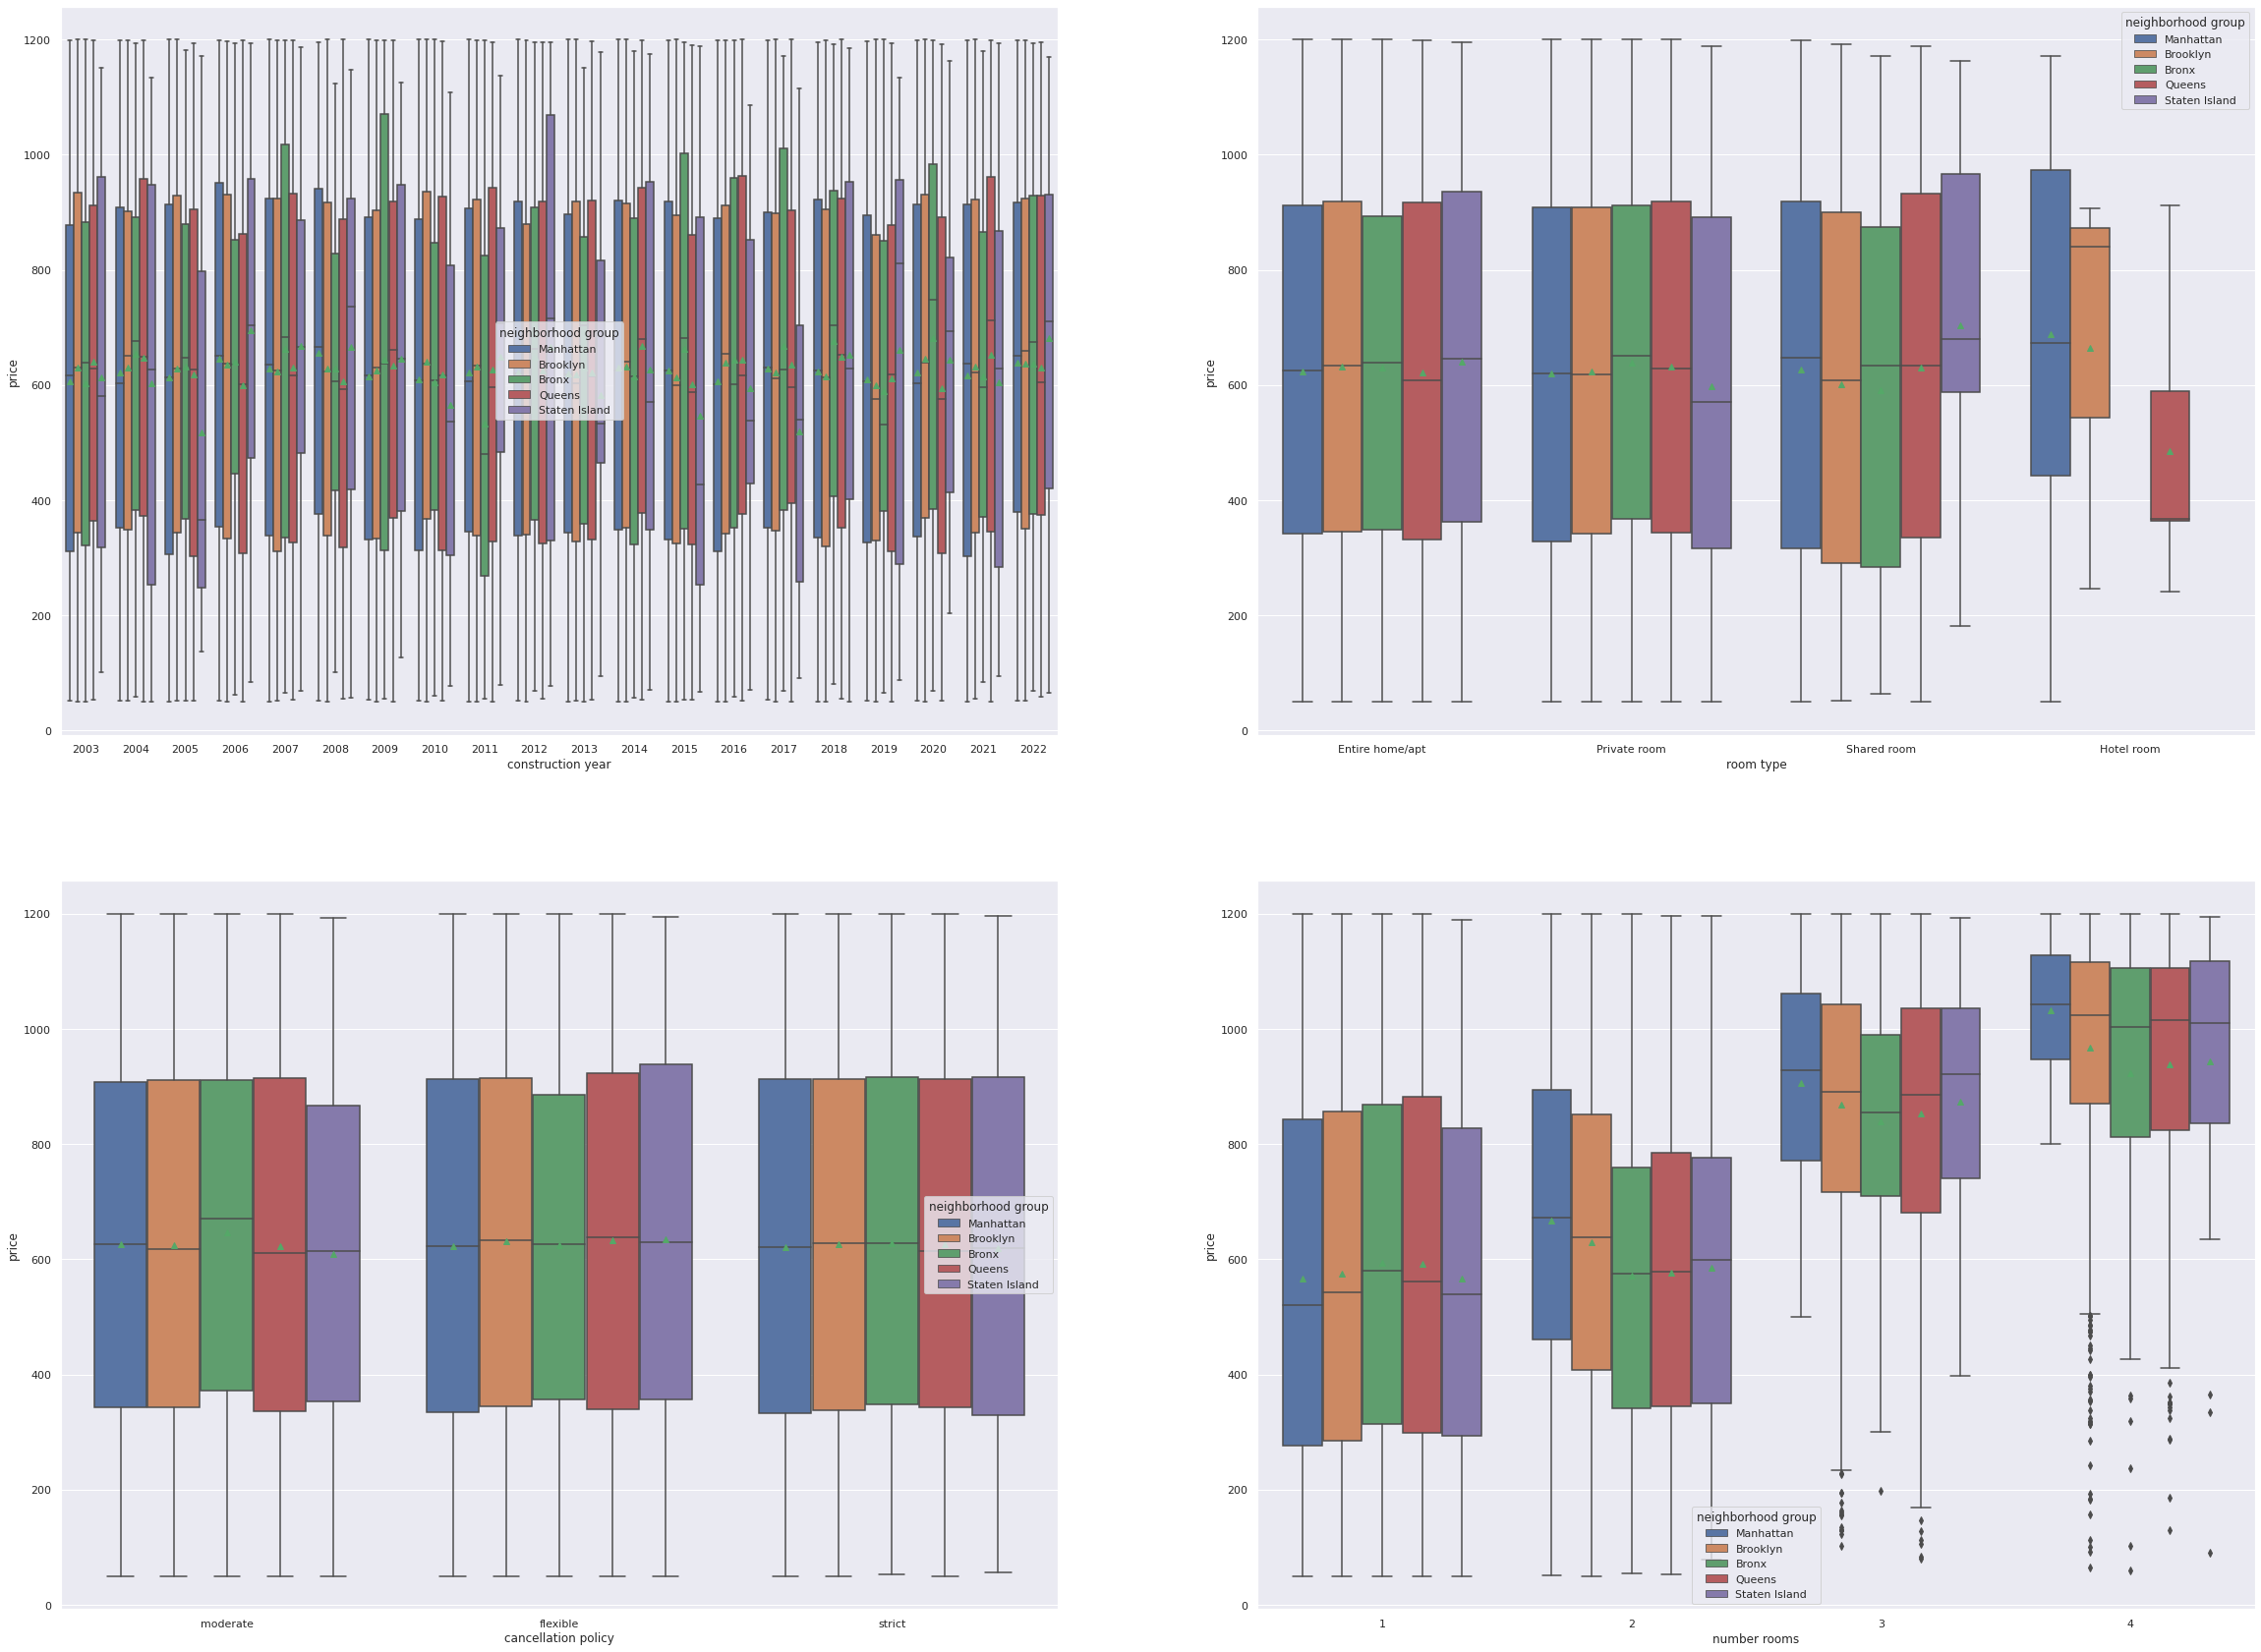

In [13]:
# Your answer goes here
fig, axes = plt.subplots(2, 2, figsize=(40,30))
sns.boxplot(x="construction year", y="price",
            hue="neighborhood group", 
            data=df_clean,
            showmeans=True,ax=axes[0, 0])
sns.boxplot(x="number rooms", y="price",
            hue="neighborhood group", 
            data=df_clean,
            showmeans=True,ax=axes[1, 1])
sns.boxplot(x="cancellation policy", y="price",
            hue="neighborhood group", 
            data=df_clean,
            showmeans=True,ax=axes[1, 0])
sns.boxplot(x="room type", y="price",
            hue="neighborhood group",
            data=df_clean,
            showmeans=True,ax=axes[0, 1])
plt.show()

_Answer:_ 

* Construction Year / Price <br>
The biggest escalation of the prices comes form **Bronx** and **State Island**. </br> **Bronx** has ascending prices for years 2007, 2009, 2015, 2017, 2020. The appartments in this years of contrusction are going for bigger price, comparing to others. For year 2021, the price is lower. </br> **State Island** has the only one massive descending of the price, based on years 2004, 2005, 2015, 2017, 2019, 2021. So the appartments in this construction years are going cheaper, comparing to others.

* Number of rooms / Price <br>
For 1,3,4 rooms appartments, the price is maintained on the same average. The only big deviation comes for **Manhattan** and **Brooklyn** for 2 rooms appartment. Their prices are higher comparing to other neighborhood groups with the same amount of rooms. Also Manhattan 4 rooms appartment has bigger threshold price comparing to others.

* Cancellation policy / Price <br>
CP doesn't really influences the price. The only observation is that for strict CP, people are paying equaly doesn't matter of neighborhood group.

* Room Type / Price <br>
For hotel room, it really depends of the region. For example there are no hotel rooms in **Bronx** and **State Island**. For **Manhattan** the prices escalates mostly because it's the most known part of NY, that atracts a lot of tourists. We can also see that a shared room in **State Island** has bigger threshold of price comparing to other regions.




#### Multivariate Analysis for Room Type

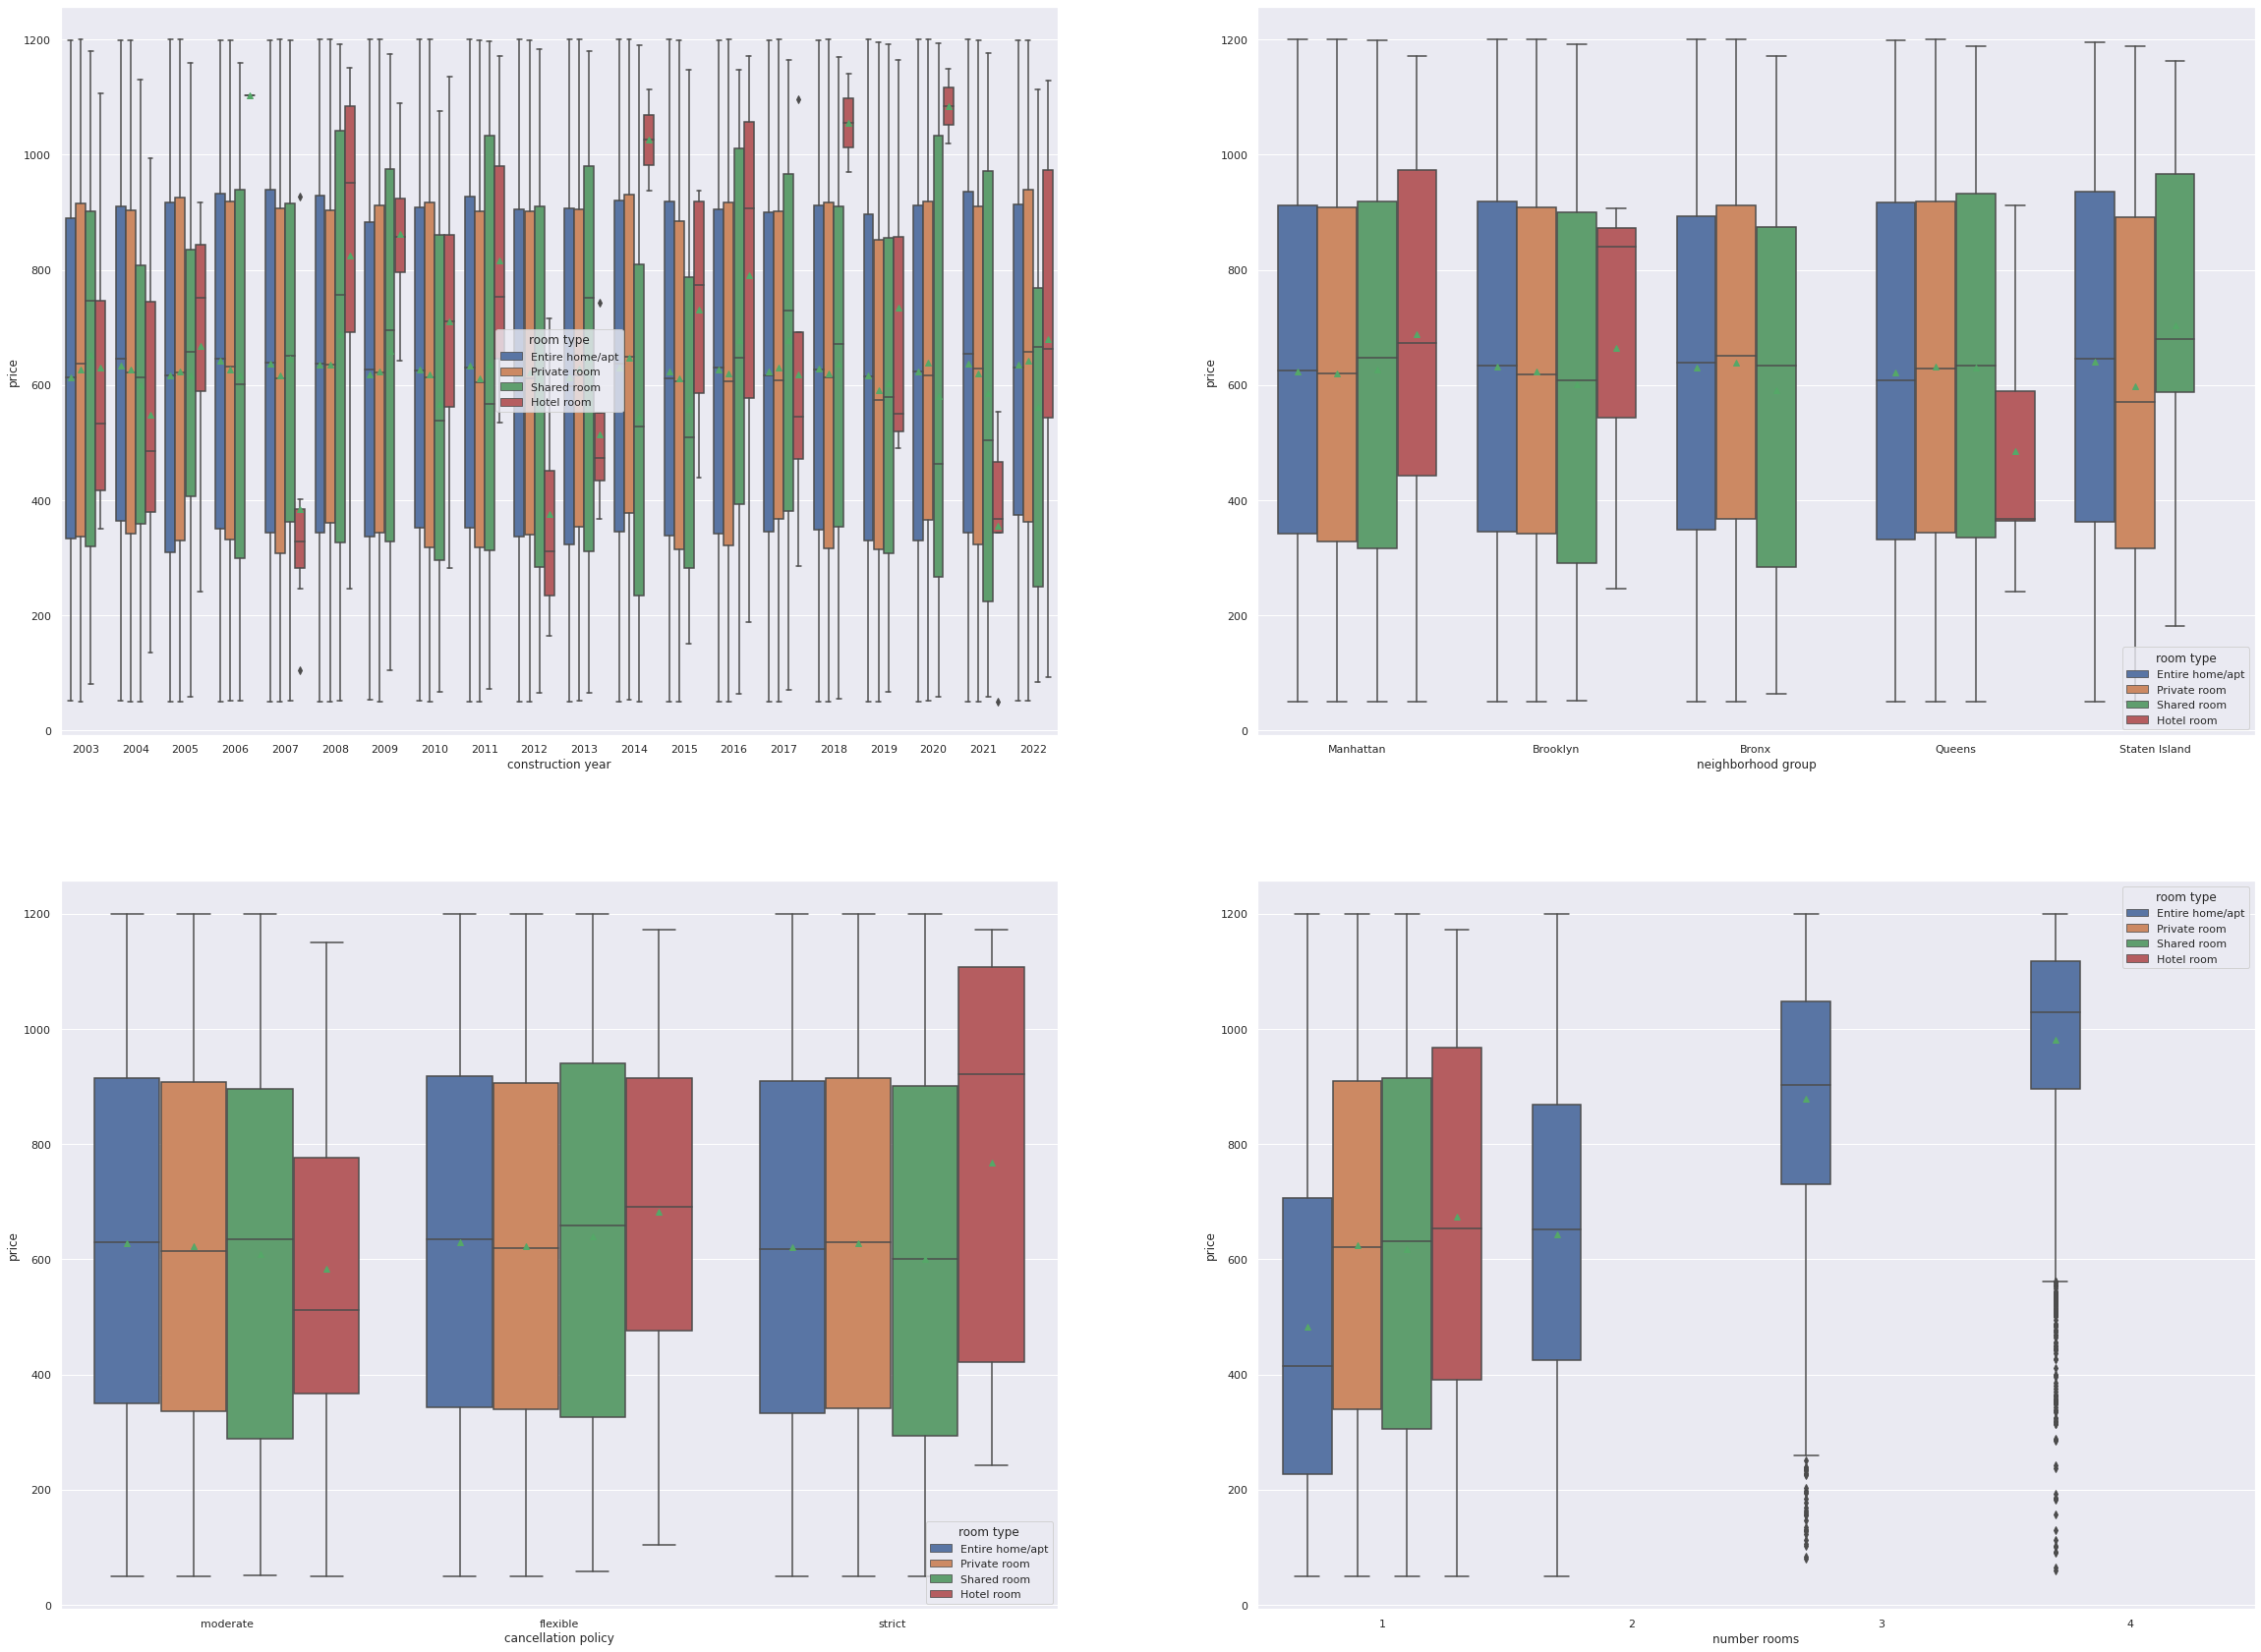

In [14]:
# Your answer goes here
fig, axes = plt.subplots(2, 2, figsize=(40,30))
sns.boxplot(x="construction year", y="price",
            hue="room type",
            data=df_clean,
            showmeans=True,ax=axes[0, 0])
sns.boxplot(x="number rooms", y="price",
            hue="room type",
            data=df_clean,
            showmeans=True,ax=axes[1, 1])
sns.boxplot(x="cancellation policy", y="price",
            hue="room type",
            data=df_clean,
            showmeans=True,ax=axes[1, 0])
sns.boxplot(x="neighborhood group", y="price",
            hue="room type",
            data=df_clean,
            showmeans=True,ax=axes[0, 1])
plt.show()

_Answer:_

* Construction year / Price <br>

**Entire home or apt** and **Private rooms** maintains their stable range of price disregarding the year. <br> For **hotel rooms**, construction years 2008, 2014, 2016 and 2022 has the biggest ascending of the price. For construction years 2018 and 2020 the price is uniquely high (starting from 900) comparing to all other types of rooms in general. We can see  <br> **Shared rooms** has mixed price interpretation. For example construction years 2008, 2009, 2011, 2013, 2016, 2017 got the higher price point, when years 2014 and 2022 got the lowest one. The biggest range of price got construction years 2020 and 2021 that escalets from +- 250 till 1000+.

* Number of rooms / Price <br>

As the graphic shows us, the price for one **Room home/apt**, is lower comparing to other types of room. But the price for an entire home gets higher starting from 2 rooms.

* Cancellation policy / Price <br>

The only room type where it cancelation policy influences different is the **hotel room**. For flexible type the price starts from 500 and ends at 900; for moderate type starts from 390 and ends at 790; for strict type starts from 410 and ends at 1100.


#### Multivariate Analysis for Number of Rooms

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

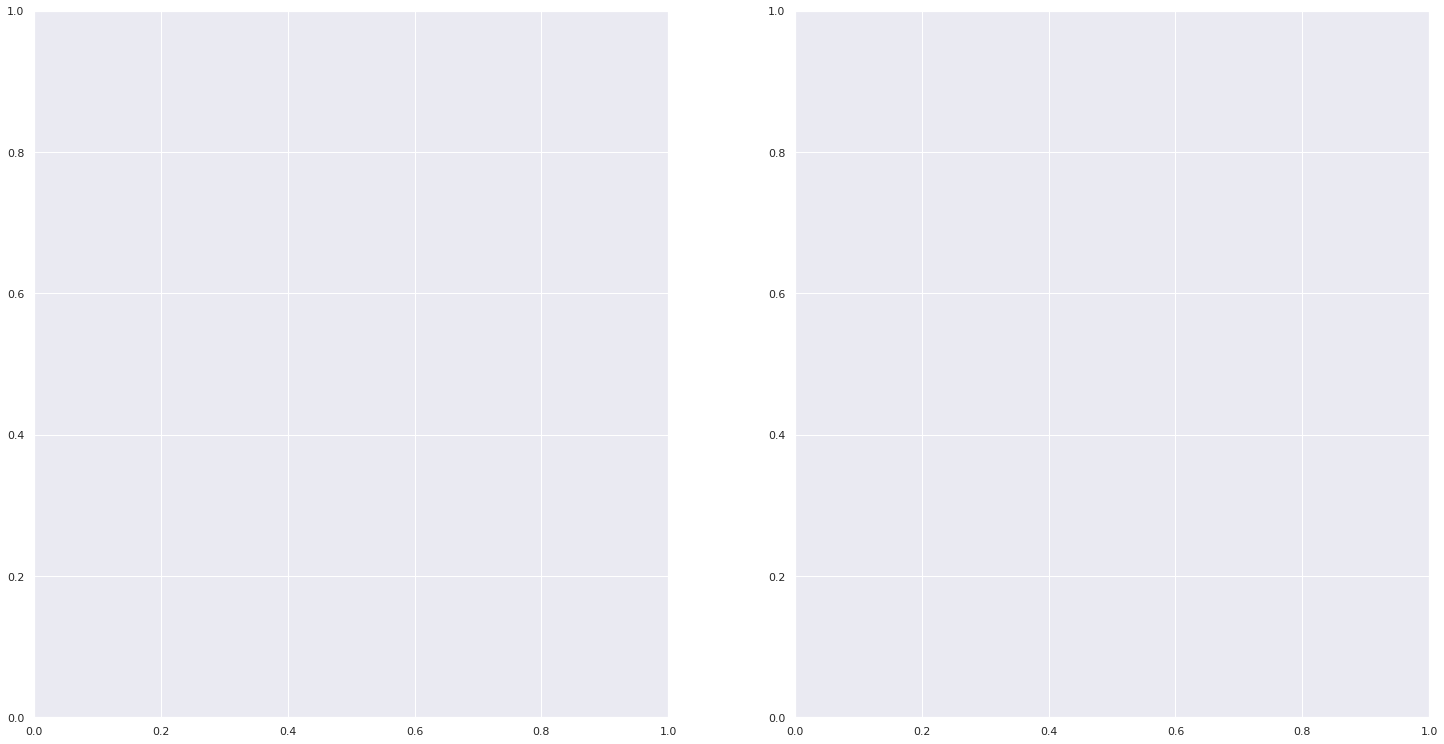

In [277]:
# Your answer goes here
fig, axes = plt.subplots(1, 2, figsize=(25,13))
df_clean['construction year'] = df_clean['construction year'].apply(str)
sns.boxplot(x="construction year", y="price",
            hue="number rooms",
            data=df_clean,
            showmeans=True,ax=axes[0, 0])
sns.boxplot(x="cancellation policy", y="price",
            hue="number rooms",
            data=df_clean,
            showmeans=True,ax=axes[0, 1])

plt.show()

_Answer:_

* Construction year / price

It remained unchaged that with more rooms, the price gets higher. The only deviation can be seen for years 2009, 2016, 2018, 2022, where the price for 1 room was highter that for 2 rooms. 


#### Multivariate Analysis for Construction Year

<AxesSubplot:xlabel='cancellation policy', ylabel='price'>

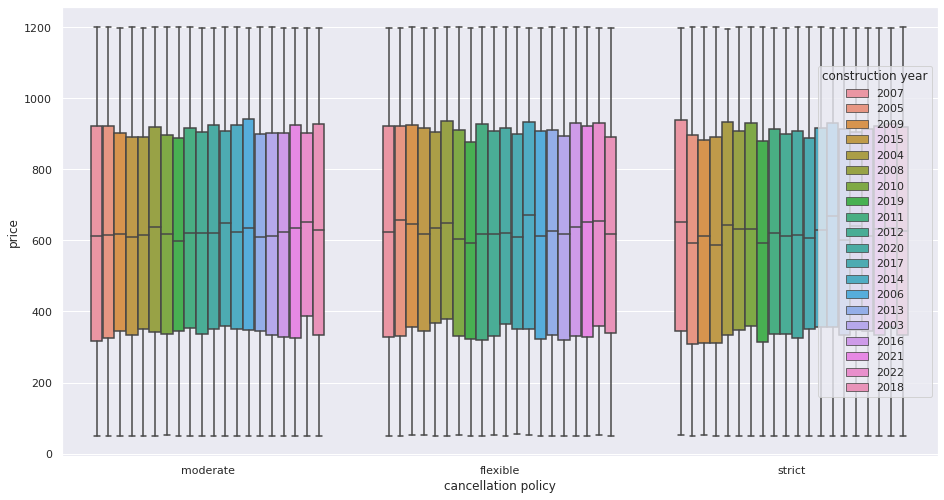

In [16]:
# Your answer goes here
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.boxplot(data=df_clean, x="cancellation policy", y="price", hue="construction year")

_Answer:_


It doesn't matter what type of cancalotion is it, the construction year, doesn't really influence.

### Selection of Variables (1 point)

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_
1. Construction Year | Price / neighborhood group
2. Number of rooms | Price / neighborhood group
3. Room type | Price / neighborhood group
4. Construction Year | Price / Room type

Those combinations gave us a nice representation what happens on the market and what criterion matters the most. For example from the first combinations we know that the construction year matter depending of the neighbourhood group and room type. Or if there are more rooms, the price is bigger. 

## Question 2: Setting the Price (45 points)

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

Using a decision tree, you try to price your apartment according to similar apartments. 

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline (5 points)

First, you want to set a baseline to compare against. You use the mean absolute error as metric. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [210]:
# Your answer goes here
df_baseline = df_clean[['number rooms', 'neighborhood group', 'room type', 'price']]
baseline_X = df_baseline.drop('price', axis=1)
baseline_y = df_baseline['price']
baseline_X_train, baseline_X_test, baseline_y_train, baseline_y_test = train_test_split(baseline_X, baseline_y, random_state=42, test_size=.05, shuffle=True)


## Decision Tree (15 points)

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600]. **(2 points)**

In [211]:
df_baseline['Price_Bins'] = pd.cut(df_baseline['price'], [49,200,400,600,800,1000,1200])
df_baseline['Price_Bins']


df_baseline


,number rooms,neighborhood group,room type,price,Price_Bins
0,2,Manhattan,Entire home/apt,142,"(49, 200]"
1,1,Manhattan,Private room,620,"(600, 800]"
2,2,Brooklyn,Entire home/apt,368,"(200, 400]"
3,1,Manhattan,Entire home/apt,204,"(200, 400]"
4,1,Brooklyn,Private room,71,"(49, 200]"
...,...,...,...,...,...
70837,1,Queens,Private room,103,"(49, 200]"
70838,1,Queens,Private room,982,"(800, 1000]"
70839,1,Queens,Private room,946,"(800, 1000]"
70840,1,Manhattan,Entire home/apt,1043,"(1000, 1200]"


Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before. **(0.5 point)**

In [216]:
descriptive_feat = df_clean[['room type', 'number rooms', 'neighborhood group']].astype(str)
target_feat = df_clean['Price_Bins'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(descriptive_feat, target_feat, test_size=0.05, random_state=42)

Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy? **(5 points)**

Note: For this task, you must use the p_decision_tree library.

In [218]:
decisionTree = DecisionTree(X_train.values.tolist(), X_train.columns.tolist(), y_train.values.tolist(), "entropy")

decisionTree.id3(0,0)

dot = decisionTree.print_visualTree(render=True)

print("System entropy: ", format(decisionTree.entropy))

You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!
System entropy:  2.5769427958177795


What is the first feature the decision tree splits on? **(0.5 point)**

_Answer:_

number of rooms

Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

**(1 point)**

_Answer:_

1. manhattan, 1 room, private = 700 <br>
2. Staten Island, 1-room, Shared room = 700




What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage. **(1 point)**

In [219]:
price_mean  = zip( ['(49, 200]','(200, 400]',
                    '(400, 600]','(600, 800]',
                    '(800, 1000]','(1000, 1200]'],
                    [125, 300, 500, 700, 900, 1100])
price_mean_dict = {key:value for key, value in price_mean}
price_mean_dict

{'(49, 200]': 125,
 '(200, 400]': 300,
 '(400, 600]': 500,
 '(600, 800]': 700,
 '(800, 1000]': 900,
 '(1000, 1200]': 1100}

To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [221]:
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, graph, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<2*len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above. **(2 points)**

In [ ]:
predictions = []
for idx in range(0,X_test.shape[0]):
    predictions.append(get_predicted_bin(X_test.iloc[idx], features, predictor))
predictions

You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error? **(3 points)**

In [223]:
predictions_mean = np.array([price_mean_dict[prediction] for prediction in predictions])
targets_mean = np.array([price_mean_dict[target] for target in y_test.values])
mean_abs_error = np.mean(np.abs(targets_mean - predictions_mean))
# alternatively: mean_absolute_error(targets_mean, predictions_mean)
print(f"Mean Absolute Error: {mean_abs_error}")

Mean Absolute Error: 267.9438329099633


## Clustering (23 points)

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding (2 points)

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [262]:
df_clusters = df_clean[['number rooms', 'neighborhood group', 'room type', 'price']]
cluster_train, cluster_test = train_test_split(df_clusters, test_size=.05, random_state=100, shuffle=True)

df_encoded = pd.get_dummies(cluster_train, prefix=['number rooms', 'neighborhood group', 'room type'], columns=['number rooms', 'neighborhood group', 'room type'])
df_encoded


,price,number rooms_1,number rooms_2,number rooms_3,number rooms_4,neighborhood group_Bronx,neighborhood group_Brooklyn,neighborhood group_Manhattan,neighborhood group_Queens,neighborhood group_Staten Island,room type_Entire home/apt,room type_Hotel room,room type_Private room,room type_Shared room
23447,887,0,1,0,0,0,0,1,0,0,1,0,0,0
44487,640,1,0,0,0,0,0,1,0,0,0,0,1,0
2706,439,1,0,0,0,0,0,1,0,0,1,0,0,0
60541,184,1,0,0,0,0,0,1,0,0,0,0,1,0
1877,411,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14260,433,1,0,0,0,0,1,0,0,0,0,0,1,0
63370,247,1,0,0,0,0,1,0,0,0,0,0,1,0
65615,896,1,0,0,0,0,0,1,0,0,0,0,0,1
56088,859,0,0,0,1,0,0,0,1,0,1,0,0,0


### Choosing number of cluniquers (8 points)

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

k=4
 centroids: [[1.05612355e+03 5.86923077e-01 1.49644970e-01 1.41834320e-01
  1.21597633e-01 2.97633136e-02 3.95325444e-01 4.21893491e-01
  1.42071006e-01 1.09467456e-02 5.48224852e-01 1.47928994e-03
  4.30059172e-01 2.02366864e-02]
 [1.94721365e+02 8.67115373e-01 1.27523974e-01 3.69289416e-03
  1.66775865e-03 2.80540830e-02 3.94246233e-01 4.27184466e-01
  1.40151290e-01 1.03639288e-02 5.37792602e-01 8.33879326e-04
  4.37727083e-01 2.36464352e-02]
 [4.81296318e+02 7.48242583e-01 2.03622066e-01 3.87823186e-02
  9.35303229e-03 3.09186227e-02 3.93661384e-01 4.22018349e-01
  1.41665674e-01 1.17359705e-02 5.41641844e-01 1.31061599e-03
  4.40903134e-01 1.61444061e-02]
 [7.65813778e+02 6.24405611e-01 2.34961959e-01 1.07465525e-01
  3.31669044e-02 3.19186876e-02 3.98300048e-01 4.23204945e-01
  1.34985735e-01 1.15905849e-02 5.43568711e-01 1.06990014e-03
  4.34498336e-01 2.08630528e-02]]
 std = 182.19583729327786


k=5
 centroids: [[4.00835280e+02 8.13157126e-01 1.68443341e-01 1.30695093e-02
 

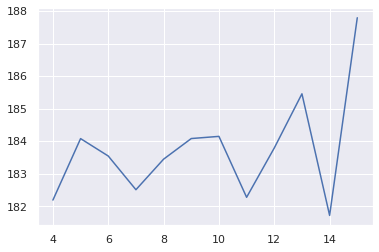

In [274]:
k_list = []
std_list = []
for cluster_num in range(4, 16):
    kmeans = KMeans(n_clusters=cluster_num, n_init=10).fit(df_encoded)
    centroids = kmeans.cluster_centers_
    print(f"k={cluster_num}\n centroids: {centroids}\n std = {np.std(centroids)}\n\n")
    k_list.append(cluster_num)
    std_list.append(np.std(centroids))
plt.plot(k_list, std_list)

In [263]:
# Your answer goes here
kmeans = KMeans(n_clusters=14, n_init=10).fit(df_encoded)

In [264]:
cl_encoded = df_encoded.assign(cluster = kmeans.labels_)
cl_encoded

,price,number rooms_1,number rooms_2,number rooms_3,number rooms_4,neighborhood group_Bronx,neighborhood group_Brooklyn,neighborhood group_Manhattan,neighborhood group_Queens,neighborhood group_Staten Island,room type_Entire home/apt,room type_Hotel room,room type_Private room,room type_Shared room,cluster
23447,887,0,1,0,0,0,0,1,0,0,1,0,0,0,3
44487,640,1,0,0,0,0,0,1,0,0,0,0,1,0,9
2706,439,1,0,0,0,0,0,1,0,0,1,0,0,0,1
60541,184,1,0,0,0,0,0,1,0,0,0,0,1,0,13
1877,411,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14260,433,1,0,0,0,0,1,0,0,0,0,0,1,0,1
63370,247,1,0,0,0,0,1,0,0,0,0,0,1,0,4
65615,896,1,0,0,0,0,0,1,0,0,0,0,0,1,3
56088,859,0,0,0,1,0,0,0,1,0,1,0,0,0,6


In [265]:
def calculate_cluster_mean(dataset: pd.DataFrame) -> pd.DataFrame:
    """A specific method that calculates mean price of each cluster and
    adds the data in a new dataframe.

    Args:
        dataset (pd.DataFrame): one hot encoded dataframe

    Returns:
        pd.DataFrame: new dataset with mean price of each cluster
    """
    
    data = {'cluster': [], 'mean_price': []}
    
    for cluster in dataset['cluster'].drop_duplicates():
        data['cluster'].append(cluster)
        data['mean_price'].append(dataset.loc[dataset['cluster'] == cluster]['price'].mean())
    
    return pd.DataFrame(data)

mean_cluster_price = calculate_cluster_mean(cl_encoded)
mean_cluster_price

,cluster,mean_price
0,3,910.441987
1,9,655.494724
2,1,405.486896
3,13,162.251673
4,11,994.037487
5,2,740.385026
6,4,241.418497
7,12,488.758081
8,5,572.645593
9,6,825.855194


 Standard Deviation: 334.9702189334264


<AxesSubplot:xlabel='cluster'>

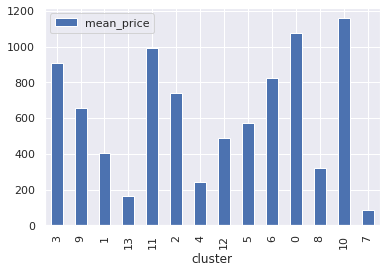

In [266]:
cluster_price_std = np.std(mean_cluster_price['mean_price'])
print(f" Standard Deviation: {cluster_price_std}")
mean_cluster_price.plot(x='cluster', y='mean_price', kind='bar')

_Answer:_ 

We have plotted standard deviation to the number of cluster. We see the local of minimal at k=7, k=11 and global minimal at k=14. k=11 would be the best solution because k of 7 and 14 would be underfiting and overfiting the problem.


**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment (3 points)

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [267]:
# Your answer goes here
# cluster for 9 clusters
kmeans = KMeans(n_clusters=9, n_init=10).fit(df_encoded)
cl_encoded = df_encoded.assign(cluster = kmeans.labels_)
cl_encoded


,price,number rooms_1,number rooms_2,number rooms_3,number rooms_4,neighborhood group_Bronx,neighborhood group_Brooklyn,neighborhood group_Manhattan,neighborhood group_Queens,neighborhood group_Staten Island,room type_Entire home/apt,room type_Hotel room,room type_Private room,room type_Shared room,cluster
23447,887,0,1,0,0,0,0,1,0,0,1,0,0,0,3
44487,640,1,0,0,0,0,0,1,0,0,0,0,1,0,8
2706,439,1,0,0,0,0,0,1,0,0,1,0,0,0,5
60541,184,1,0,0,0,0,0,1,0,0,0,0,1,0,2
1877,411,0,1,0,0,0,1,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14260,433,1,0,0,0,0,1,0,0,0,0,0,1,0,5
63370,247,1,0,0,0,0,1,0,0,0,0,0,1,0,7
65615,896,1,0,0,0,0,0,1,0,0,0,0,0,1,3
56088,859,0,0,0,1,0,0,0,1,0,1,0,0,0,3


In [268]:
mean_cluster_price = calculate_cluster_mean(cl_encoded)
mean_cluster_price

,cluster,mean_price
0,3,892.968215
1,8,635.320774
2,5,383.446763
3,2,118.858441
4,6,1017.844909
5,7,253.216237
6,4,763.771126
7,1,508.610456
8,0,1140.170480


### Evaluating clustering (10 points)

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [276]:
import sklearn
import umap.umap_ as umap

#Preprocessing numerical
full_data = cluster_train # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result. **(5 points)**

<AxesSubplot:>

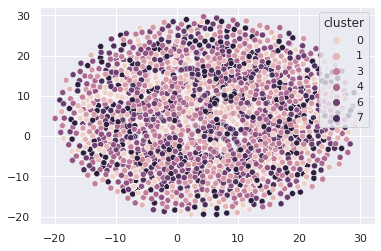

In [278]:
# Your answer goes here
sns.scatterplot(data=cluster_train,x=dimension1,y=dimension2, hue=cl_encoded['cluster'])

_Answer:_



We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices. **(5 points)**

In [284]:
# Your answer goes here
test_encoded = pd.get_dummies(cluster_test, prefix=['number rooms', 'neighborhood group', 'room type'], columns=['number rooms', 'neighborhood group', 'room type'])
kmeans_test = KMeans(n_clusters=9, n_init=10).fit(test_encoded)
test_encoded = test_encoded.assign(cluster = kmeans_test.labels_)
new_prediction = calculate_cluster_mean(test_encoded)
# new_prediction
mean_absolute_error = np.abs(new_prediction['mean_price']-mean_cluster_price['mean_price'])
mean_absolute_error

0    628.523770
1    503.528388
2    154.179687
3    557.821776
4      2.688799
5    547.535032
6    642.181126
7    102.455246
8    230.596136
Name: mean_price, dtype: float64

## Final comments on the price prediction (2 points)

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_



## Question 3: Investigating Price Elasticity (32 Points)

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice. **(2 points)**

<AxesSubplot:xlabel='price', ylabel='utilization'>

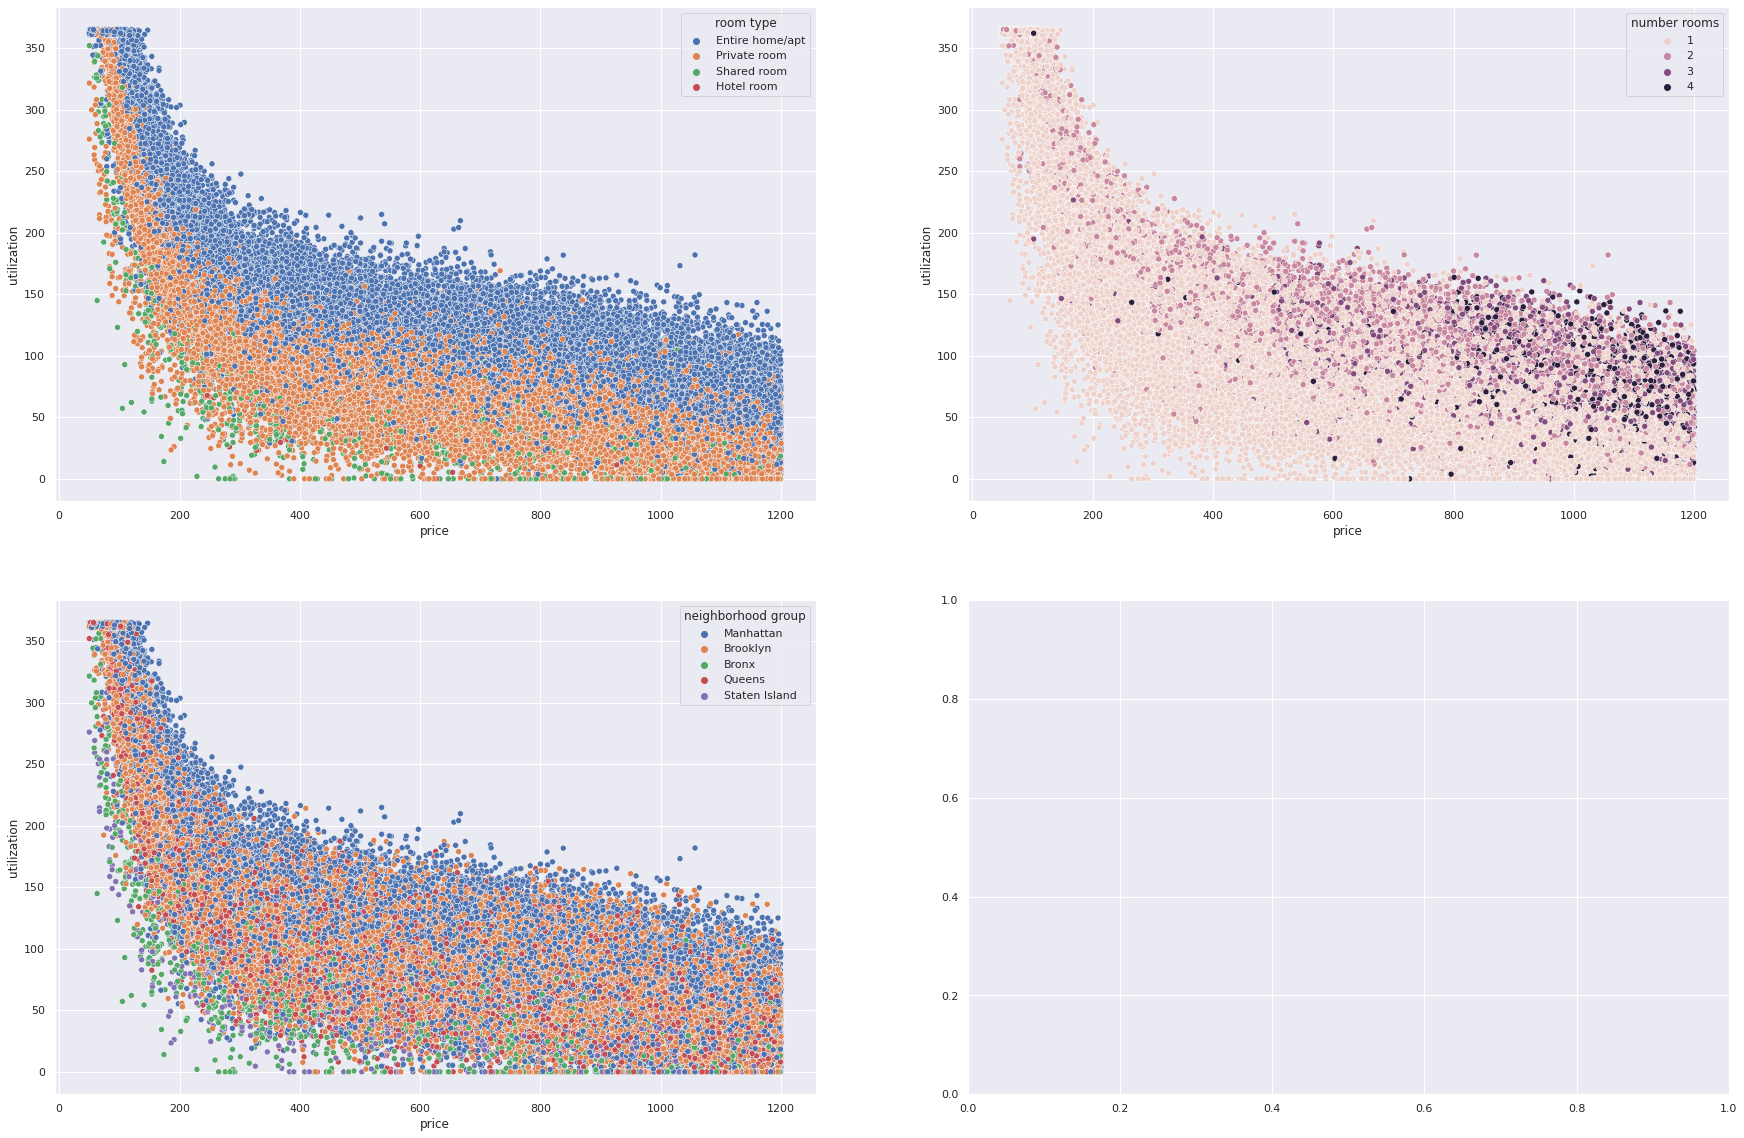

In [228]:
# Your answer goes here
df_utilization = pd.read_csv(airbnb_utilization_path).drop('id', axis=1)

fig, axes = plt.subplots(2,2, figsize=(30, 20))
sns.scatterplot(data=df_utilization, x=df_utilization['price'], y=df_utilization['utilization'], hue=df_utilization['room type'], ax=axes[0, 0])
sns.scatterplot(data=df_utilization, x=df_utilization['price'], y=df_utilization['utilization'], hue=df_utilization['number rooms'], ax=axes[0, 1])
sns.scatterplot(data=df_utilization, x=df_utilization['price'], y=df_utilization['utilization'], hue=df_utilization['neighborhood group'], ax=axes[1, 0])


You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity (25 points)
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

#### Prepare the data set by splitting, one-hot encoding, and normalizing. (5 points)

In [243]:
# Your answer goes here
# encoded_unil = transform_one_hot_encoder(df_unilization, df_unilization.columns[:-1].tolist())
from sklearn.preprocessing import normalize
X = df_utilization.drop(['utilization'], axis=1)
y = df_utilization['utilization']

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_features = onehot_encoder.fit_transform(X)
# normalized_labels = normalize([y.values])

X_test, X_train, y_test, y_train = train_test_split(onehot_encoded_features, y.values, random_state=42, train_size=0.05, shuffle=True)

For each technique, use 5-cross-fold validation for hyperparameter optimization and assess the performance on the test set. 

#### Regression (5 points)

Learn a linear regression to predict the utilization of an AirBnB.

In [247]:
# Your answer goes here
reg = LinearRegression().fit(X_train, y_train)
# reg.score(util_x_train, util_x_train)
predicted_reg = reg.predict(X_test)
predicted_reg

array([235.25    ,  60.203125,  65.140625, ...,  24.25    , 161.390625,
        52.      ])

What is the mean absolute error achieved on the test data?

In [248]:
# Your answer goes here
mean_absolute_error(y_test, predicted_reg)

19.693318466112366

Show (draw!) the price elasticity for your apartment. 

<AxesSubplot:>

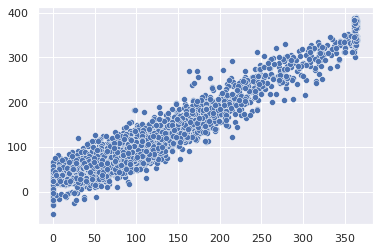

In [251]:
# Your answer goes here
sns.scatterplot(x=y_test, y=predicted_reg) # x price, y elasticity - hue:descr features


#### Linear SVR (5 points)

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [252]:
# Your answer goes here
lsvr = LinearSVR(verbose=0, dual=True)
lsvr.fit(X_train, y_train)
ypred = lsvr.predict(X_test)

What is the mean absolute error achieved on the test data?

In [253]:
# Your answer goes here
mean_absolute_error(y_test, ypred)

34.85899873887146

Show (draw!) the price elasticity for your apartment. 

<AxesSubplot:>

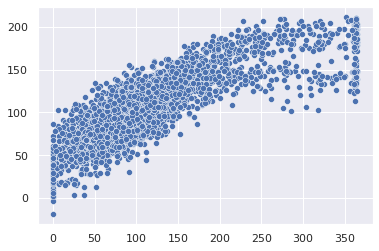

In [254]:
# Your answer goes here
sns.scatterplot(x=y_test, y=ypred)

#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression (2.5 points)

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [258]:
# Your answer goes here

from sklearn.kernel_ridge import KernelRidge

from sklearn.metrics.pairwise import polynomial_kernel

# shortening train data due to computational issues
X_train_KRR = X_train[:19000]
y_train_KRR = y_train[:19000]

K = polynomial_kernel(X=X_train_KRR,degree=2)
md = KernelRidge(alpha=1, kernel=K, gamma=None, degree=2, coef0=1, kernel_params=None)
md = KernelRidge().fit(X_train_KRR,y_train_KRR)

ypred_md = md.predict(X_test)

What is the mean absolute error achieved on the test data?

In [259]:
# Your answer goes here
mean_absolute_error(y_test, ypred_md)

20.41967697039518

Show (draw!) the price elasticity for your apartment. 

<AxesSubplot:>

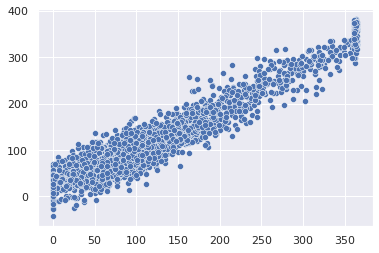

In [260]:
# Your answer goes here
sns.scatterplot(x=y_test, y=ypred_md)

#### Kernels in SVR (2.5 points)

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [261]:
# Your answer goes here
from sklearn.svm import SVR
# import sklearn.metrics.pairwise as pr
# new_K = pr.rbf_kernel(X=X_train_KRR)
# shortening train data due to computational issues
svr_rbf = SVR(kernel='poly', degree=5, C=0.00001, gamma=1, epsilon=1e-10)
X_train_SVR=X_train[:20000]
y_train_SVR=y_train[:20000]
svr_rbf.fit(X_train_SVR, y_train_SVR)
pred_svr_rbf = svr_rbf.predict(X_test)

What is the mean absolute error achieved on the test data?

In [269]:
# Your answer goes here
mean_absolute_error(pred_svr_rbf, y_test)

56.36659158996284

Show (draw!) the price elasticity for your apartment. 

<AxesSubplot:>

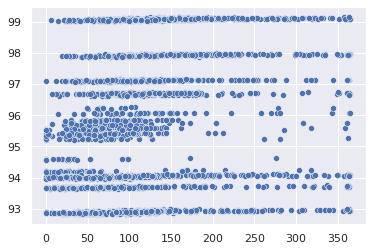

In [270]:
# Your answer goes here
sns.scatterplot(x=y_test, y=pred_svr_rbf)

What is your conclusion on using kernels?

_Answer:_ 

Kernels encode the relationship of input features. They are especially useful to encode non-linear relationships. Different types of Kernels encode different features eg. radial bases encode blobs/Mixture of Gaussian, polynomial kernel encode polynomial features  in Input data. The selection of Hyperparameters like C(controls overfitting) here is very necessary during training.



#### Neural Network (5 points)

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [280]:
# Your answer goes here
clf = MLPRegressor(random_state=1, max_iter=30)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

What is the mean absolute error achieved on the test data?

In [281]:
# Your answer goes here
mean_absolute_error(clf_pred, y_test)

19.13068665607242

Show (draw!) the price elasticity for your apartment. 

<AxesSubplot:>

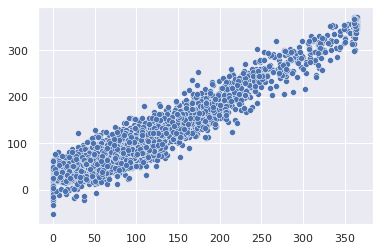

In [283]:
# Your answer goes here
sns.scatterplot(x=y_test, y=clf_pred)

### Profit discrepencies when incorporating price elasticity (5 points)

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [ ]:
# Your answer goes here


_Answer:_



# Question 4: Conclusion (5 points)

Summarize your findings and discuss limitations.

_Answer:_  

From this assignment we've tried different data cleaning/management and machine learning techniques that helped us to see the bigger picture of renting an apartment in NY. <br>

Based on different criteria, we compared the price to get some useful information that helped us to understand where we should concentrate the most. Different correlations show some interesting information that influences the decision of putting the price for an apartment. One of them is that construction year can influence the price, depending on which neighborhood groups the apartment is located in or how many rooms it has. <br>

Knowing this specific information it becomes easier to set the price higher on lower. Setting the price using different algorithms gave some expectations for pricing. For example using Decision Tree, it is possible now to have a price range giving exact criteria and evaluate the results using the exploratory information. After cluster training and analysis it is easier to classify a given apartment into specific criteria that defines a negotiable price. <br>

To see how good the models work, there were some evaluations made that confirm how accurate the models are and the given results.
 
